In [1]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# statsmodels issue: https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

sns.set(style="white")
%matplotlib inline

In [2]:
np.random.seed(1)

df = pd.read_csv("./Data/Default.csv", index_col=0)

df['default_yes'] = (df['default'] == 'Yes').astype('int')
df.head()

,default,student,balance,income,default_yes
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 5 columns):
default        10000 non-null object
student        10000 non-null object
balance        10000 non-null float64
income         10000 non-null float64
default_yes    10000 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [4]:
f = 'default_yes ~ income + balance'
res = smf.logit(formula=f, data=df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Dec 2019   Pseudo R-squ.:                  0.4594
Time:                        15:51:52   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [5]:
#1. Split the sample set into a training set and a validation set.

In [6]:
X = df[['income', 'balance']]
y = df['default_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [7]:
#2. Fit a multiple logistic regression model using only the training observations.

In [8]:
lr = LogisticRegression()
mod = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#3. Obtain a prediction of default status for each individual in the validation set

In [14]:
xx, yy = np.mgrid[0:80000:100, -100:3000:10]
grid = np.c_[xx.ravel(), yy.ravel()]                    # https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
probs = mod.predict_proba(grid)[:, 1].reshape(xx.shape)

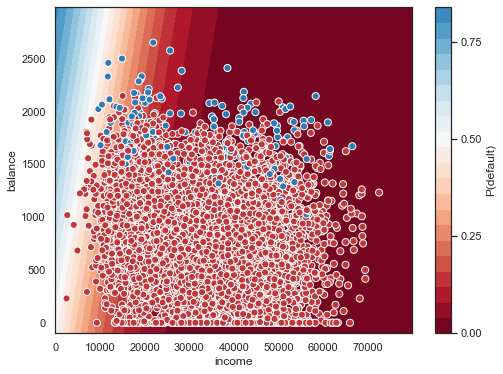

In [15]:
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",    # 25 levels
                     vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("P(default)")
ax_c.set_ticks([0,0.25,0.5,.75,1])

ax.scatter(X_test['income'], X_test['balance'], c=y_test, s=50, 
          cmap="RdBu", vmin=-0.2, vmax=1.2,
          edgecolor="white", linewidth=1)

ax.set(xlabel="income", ylabel="balance");

In [ ]:
#4. Compute the validation set error

In [12]:
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.032200000000000006

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.03374999999999995

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
y_pred = mod.predict(X_test)
1-(y_pred == y_test).mean()

0.03466666666666662

In [20]:
logreg = LogisticRegression()
logreg.fit(X, y)

plot_auc_curve(logreg, X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'plot_auc_curve' is not defined